<a href="https://colab.research.google.com/github/giladelian/ML-For-Beginners/blob/main/ads_gilad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import files
import io
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
uploaded = files.upload()

Saving advertisments - advertisments.csv to advertisments - advertisments (1).csv


In [ ]:
ads = pd.read_csv(io.BytesIO(uploaded['advertisments - advertisments.csv']))

In [ ]:
ads.shape

(400, 5)

In [ ]:
ads.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [ ]:
ads.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
ads['Purchased'].unique

<bound method Series.unique of 0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64>

In [ ]:
ads.drop(columns=['User ID'])

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [ ]:
ads

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
X = pd.get_dummies(ads['Gender']).join(ads['Age']).join(ads['EstimatedSalary'])
X.head()

,Female,Male,Age,EstimatedSalary
0,0,1,19,19000
1,0,1,35,20000
2,1,0,26,43000
3,1,0,27,57000
4,0,1,19,76000


In [ ]:
y = ads['Purchased']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5000)

In [ ]:
log_reg = LogisticRegression(solver='liblinear')

In [ ]:
log_reg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
predictions = log_reg.predict(X_test)

In [ ]:
log_reg.score(X_test, y_test)

0.89

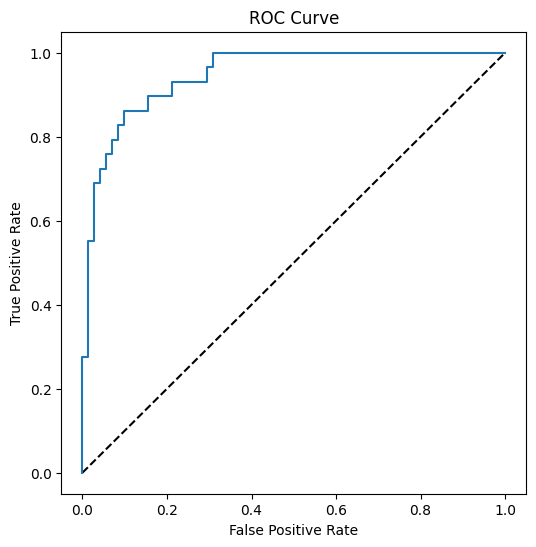

In [ ]:
y_scores = log_reg.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

fig = plt.figure(figsize=(6, 6))

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()





In [ ]:
sc = StandardScaler()

In [ ]:
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [ ]:
log_reg_scaled = LogisticRegression(solver='liblinear')

In [ ]:
log_reg_scaled.fit(X_train_scaled, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
predictions_scaled = log_reg_scaled.predict(X_test_scaled)

In [ ]:
confusion_matrix(y_test, predictions_scaled)

array([[63,  8],
       [ 4, 25]])

In [ ]:
log_reg_scaled.score(X_test_scaled, y_test)

0.88

In [ ]:
from sklearn import svm
from sklearn.svm import SVC

In [ ]:
classif = svm.SVC()
classif.fit(X_train_scaled, y_train)

SVC()

In [ ]:
pred_SVC_scaled = classif.predict(X_test_scaled)

In [ ]:
confusion_matrix(y_test, pred_SVC_scaled)

array([[62,  9],
       [ 1, 28]])

In [ ]:
classif.score(X_test_scaled, y_test)

0.9

In [ ]:
log_reg_scaled.score(X_test_scaled, y_test)

0.88